In [1]:
import pandas as pd

In [2]:
#Retrieving data from top5 european league players

url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"

df = pd.read_html(url, attrs={"id": "stats_standard"}) 

#Getting the first item from the list
df = df[0]

In [3]:
#Dropping per 90 stats and creating our own later
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

In [4]:
#Dropping top header that we dont need
df = df.droplevel(0, axis = 1)

In [5]:
#Filtering for position, Forward
df = df[df['Pos'].str.contains('DF')]

In [6]:
#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df = df[df['Min'].astype(int) > 1500]
df = df[df['Age'].astype(int) <= 27]

In [7]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
11,12,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,24,1999,27,27,...,10,0,0.5,0.5,0.2,0.6,7,49,1,Matches
20,21,Tosin Adarabioyo,eng ENG,DF,Fulham,eng Premier League,25,1997,20,18,...,2,0,0.7,0.7,0.1,0.8,10,62,5,Matches
31,31,Emmanuel Agbadou,ci CIV,DF,Reims,fr Ligue 1,26,1997,32,29,...,1,0,2.4,2.4,1.5,3.8,42,179,19,Matches
35,35,Felix Agu,de GER,"DF,MF",Werder Bremen,de Bundesliga,23,1999,24,19,...,2,0,0.9,0.9,0.6,1.5,32,32,90,Matches
36,36,Nayef Aguerd,ma MAR,DF,West Ham,eng Premier League,27,1996,21,21,...,3,1,1.5,1.5,0.3,1.8,10,68,3,Matches
40,40,Anel Ahmedhodžić,ba BIH,DF,Sheffield Utd,eng Premier League,24,1999,31,29,...,11,1,3.1,3.1,0.8,4.0,15,43,21,Matches
42,42,Ola Aina,ng NGA,DF,Nott'ham Forest,eng Premier League,26,1996,22,20,...,3,0,0.3,0.3,0.9,1.2,53,68,38,Matches
43,43,Rayan Aït-Nouri,dz ALG,"DF,MF",Wolves,eng Premier League,22,2001,33,29,...,7,0,3.3,3.3,2.4,5.6,67,99,99,Matches
45,45,Kristoffer Ajer,no NOR,DF,Brentford,eng Premier League,25,1998,28,21,...,5,0,1.3,1.3,2.3,3.6,22,61,31,Matches
52,51,Sergio Akieme,es ESP,DF,Almería,es La Liga,25,1997,19,19,...,2,0,1.2,1.2,2.2,3.3,27,28,72,Matches


In [8]:
#What columns do we have?
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches'],
      dtype='object')

In [9]:
#Casting the data based on the metrics

df[['90s', 'npxG', 'xAG']] = df[['90s', 'npxG', 'xAG']].astype(float)

df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [10]:
#Calculating per 90 metrics

df['goals_per_90'] = df['Gls'] / df['90s']
df['npxG_per_90'] = df['npxG'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['xAG_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [11]:
df_sorted = df.sort_values(by='90s', ascending=False)
df_sorted[['Player', 'Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR', 'xAG', '90s']].head(20)

,Player,Gls,Ast,PrgC,PrgP,PrgR,xAG,90s
2409,William Saliba,2,1,16,157,6,0.2,38.0
1386,Max Kilman,2,0,22,117,5,1.4,38.0
107,Joachim Andersen,2,3,21,147,10,2.8,37.9
1597,Sebastiano Luperto,1,1,13,100,13,1.0,37.8
2915,Illia Zabarnyi,1,0,24,109,1,0.4,37.0
236,Federico Baschirotto,0,1,28,96,3,0.7,36.6
2332,Antonee Robinson,0,6,99,129,194,4.2,36.3
2176,Nehuén Pérez,0,0,28,119,24,0.2,36.0
391,Gleison Bremer,3,0,7,120,4,0.4,35.9
2225,Marin Pongračić,0,0,45,134,7,0.4,35.8


In [12]:
df_goals = df.sort_values(by='goals_per_90', ascending=False)
df_goals[['Player', 'Squad', 'Min', 'goals_per_90']].head(25)

,Player,Squad,Min,goals_per_90
945,Jeremie Frimpong,Leverkusen,2251,0.360000
1075,Álex Grimaldo,Leverkusen,2784,0.323625
2544,Tim Skarke,Darmstadt 98,2404,0.299625
1395,Ansgar Knauff,Eint Frankfurt,2109,0.299145
761,Ritsu Doan,Freiburg,2246,0.280000
717,Bafodé Diakité,Lille,1696,0.265957
744,Junior Dina Ebimbe,Eint Frankfurt,1956,0.230415
807,Denzel Dumfries,Inter,1639,0.219780
742,Federico Dimarco,Inter,2077,0.216450
2474,Keven Schlotterbeck,Bochum,2185,0.205761


In [13]:
df_assists = df.sort_values(by='assists_per_90', ascending=False)
df_assists[['Player', 'Squad', 'Min', 'Age', 'assists_per_90']].head(20)

,Player,Squad,Min,Age,assists_per_90
1075,Álex Grimaldo,Leverkusen,2784,27,0.420712
1199,Franck Honorat,Gladbach,2345,26,0.344828
619,Yan Couto,Girona,2245,21,0.321285
1113,Malo Gusto,Chelsea,1751,20,0.307692
2323,Rodrigo Riquelme,Atlético Madrid,1528,23,0.294118
945,Jeremie Frimpong,Leverkusen,2251,22,0.280000
2284,David Raum,RB Leipzig,2739,25,0.263158
742,Federico Dimarco,Inter,2077,25,0.259740
2431,Manu Sánchez,Celta Vigo,1775,22,0.253807
788,Alfie Doughty,Luton Town,2925,23,0.246154


In [14]:
df_carries = df.sort_values(by='progressive_carries_per_90', ascending=False)
df_carries[['Player', 'Squad', 'progressive_carries_per_90']].head(15)

,Player,Squad,progressive_carries_per_90
945,Jeremie Frimpong,Leverkusen,6.120000
619,Yan Couto,Girona,6.064257
2023,Chiedozie Ogbene,Luton Town,5.720721
1538,Samuel Lino,Atlético Madrid,5.670996
671,Alphonso Davies,Bayern Munich,5.283843
2323,Rodrigo Riquelme,Atlético Madrid,5.117647
270,Raoul Bellanova,Torino,4.171598
1113,Malo Gusto,Chelsea,4.000000
1131,Achraf Hakimi,Paris S-G,3.906977
1199,Franck Honorat,Gladbach,3.716475


In [15]:
df_xAG = df.sort_values(by='xAG_per_90', ascending=False)
df_xAG[['Player', 'Squad', 'Min', 'Age', 'xAG_per_90']].head(20)

,Player,Squad,Min,Age,xAG_per_90
742,Federico Dimarco,Inter,2077,25,0.367965
1199,Franck Honorat,Gladbach,2345,26,0.356322
70,Trent Alexander-Arnold,Liverpool,2155,24,0.301255
1075,Álex Grimaldo,Leverkusen,2784,27,0.294498
807,Denzel Dumfries,Inter,1639,27,0.269231
1131,Achraf Hakimi,Paris S-G,1932,24,0.241860
2284,David Raum,RB Leipzig,2739,25,0.240132
945,Jeremie Frimpong,Leverkusen,2251,22,0.236000
1114,Miguel Gutiérrez,Girona,3032,22,0.222552
1113,Malo Gusto,Chelsea,1751,20,0.220513


In [16]:
df_receptions = df.sort_values(by='progressive_receptions_per_90', ascending=False)
df_receptions[['Player', 'Squad', 'Age', 'Min', 'progressive_receptions_per_90']].head(15)

,Player,Squad,Age,Min,progressive_receptions_per_90
945,Jeremie Frimpong,Leverkusen,22,2251,13.920000
1131,Achraf Hakimi,Paris S-G,24,1932,10.697674
2323,Rodrigo Riquelme,Atlético Madrid,23,1528,9.764706
619,Yan Couto,Girona,21,2245,9.638554
1538,Samuel Lino,Atlético Madrid,23,2080,9.307359
1199,Franck Honorat,Gladbach,26,2345,9.272031
1710,Marvin,Las Palmas,23,1855,8.592233
742,Federico Dimarco,Inter,25,2077,8.571429
1075,Álex Grimaldo,Leverkusen,27,2784,8.446602
1858,Nahuel Molina,Atlético Madrid,25,1852,8.252427


In [17]:
df_npxG = df.sort_values(by='npxG_per_90', ascending=False)
df_npxG[['Player', 'Age', 'Squad', 'npxG_per_90']].head(20)

,Player,Age,Squad,npxG_per_90
945,Jeremie Frimpong,22,Leverkusen,0.328000
1395,Ansgar Knauff,21,Eint Frankfurt,0.243590
1538,Samuel Lino,23,Atlético Madrid,0.242424
744,Junior Dina Ebimbe,22,Eint Frankfurt,0.230415
761,Ritsu Doan,25,Freiburg,0.200000
1131,Achraf Hakimi,24,Paris S-G,0.195349
2023,Chiedozie Ogbene,26,Luton Town,0.189189
991,Federico Gatti,25,Juventus,0.187713
1075,Álex Grimaldo,27,Leverkusen,0.184466
496,Matty Cash,25,Aston Villa,0.176471


In [18]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90'],
      dtype='object')

In [19]:
standard_stats = df[['Player', 'Age', 'Squad', 'Min', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90']]

standard_stats.head()

,Player,Age,Squad,Min,goals_per_90,npxG_per_90,assists_per_90,xAG_per_90,progressive_carries_per_90,progressive_passes_per_90,progressive_receptions_per_90
11,Abdel Abqar,24,Alavés,2312,0.000000,0.019455,0.000000,0.007782,0.272374,1.906615,0.038911
20,Tosin Adarabioyo,25,Fulham,1617,0.111111,0.038889,0.000000,0.005556,0.555556,3.444444,0.277778
31,Emmanuel Agbadou,26,Reims,2596,0.034722,0.083333,0.034722,0.052083,1.458333,6.215278,0.659722
35,Felix Agu,23,Werder Bremen,1614,0.000000,0.050279,0.000000,0.033520,1.787709,1.787709,5.027933
36,Nayef Aguerd,27,West Ham,1857,0.048544,0.072816,0.000000,0.014563,0.485437,3.300971,0.145631


In [20]:
#Retrieving data from top5 european league players

url1 = "https://fbref.com/en/comps/Big5/2023-2024/passing/players/2023-2024-Big-5-European-Leagues-Stats"

df1 = pd.read_html(url1, attrs={"id": "stats_passing"}) 

#Getting the first item from the list
df1 = df1[0]

In [21]:
#Dropping per 90 stats and creating our own later
df1 = df1[df1.columns.drop(list(df1.filter(regex='Per 90')))]

In [22]:
#Dropping top header that we dont need
df1 = df1.droplevel(0, axis = 1)

In [23]:
#Filtering for position, Forward
df1 = df1[df1['Pos'].str.contains('DF')]

In [24]:
#Casting the data based on the metrics

df1[['90s', 'xA', 'xAG']] = df1[['90s', 'xA', 'xAG']].astype(float)

df1[['Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']] = df1[['Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']].astype(int)

In [25]:
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,13.7,450,...,1,0.8,0.9,+0.2,7,25,13,2,43,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,30.9,1552,...,0,0.3,0.6,-0.3,8,129,3,0,137,Matches
6,7,Nabil Aberdin,fr FRA,DF,Getafe,es La Liga,20,2002,2.0,60,...,0,0.0,0.0,0.0,0,4,0,0,7,Matches
9,10,Abner,br BRA,DF,Betis,es La Liga,23,2000,15.6,615,...,1,1.0,1.0,0.0,8,20,7,2,33,Matches
11,12,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,24,1999,25.7,553,...,0,0.2,0.2,-0.2,3,61,2,0,49,Matches


In [26]:
average_90s = df1['90s'].mean()
print("Average of '90s' column:", average_90s)

Average of '90s' column: 14.652607913669065


In [27]:
#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df1 = df1[df1['90s'] > 15]

In [28]:
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,30.9,1552,...,0,0.3,0.6,-0.3,8,129,3,0,137,Matches
9,10,Abner,br BRA,DF,Betis,es La Liga,23,2000,15.6,615,...,1,1.0,1.0,0.0,8,20,7,2,33,Matches
11,12,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,24,1999,25.7,553,...,0,0.2,0.2,-0.2,3,61,2,0,49,Matches
13,14,Francesco Acerbi,it ITA,DF,Inter,it Serie A,35,1988,26.5,1615,...,1,1.8,1.3,-0.8,7,58,5,2,87,Matches
20,21,Tosin Adarabioyo,eng ENG,DF,Fulham,eng Premier League,25,1997,18.0,1028,...,0,0.1,0.3,-0.1,2,47,2,0,62,Matches


In [29]:
#Calculating per 90 metrics

df1['assists_per_90'] = df1['Ast'] / df1['90s']
df1['expected_assists_per_90'] = df1['xA'] / df1['90s']
df1['key_passes_per_90'] = df1['KP'] / df1['90s']
df1['final_third_passes_per_90'] = df1['1/3'] / df1['90s']
df1['passes_into_penalty_area_per_90'] = df1['PPA'] / df1['90s']
df1['crosses_into_penalty_area_90'] = df1['CrsPA'] / df1['90s']
df1['progressive_passes_per_90'] = df1['PrgP'] / df1['90s']

In [30]:
df1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp',
       'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'assists_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90'],
      dtype='object')

In [31]:
df1_sorted = df1.sort_values(by='crosses_into_penalty_area_90', ascending=False)
df1_sorted[['Player', 'Pos', 'assists_per_90', 'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90']].head(10)

,Player,Pos,assists_per_90,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90,progressive_passes_per_90
742,Federico Dimarco,DF,0.259740,0.324675,2.640693,2.597403,2.467532,1.298701,4.329004
966,Antonino Gallo,DF,0.108303,0.111913,1.696751,3.068592,1.588448,1.155235,4.512635
2316,Diego Rico,DF,0.248227,0.120567,1.382979,3.758865,1.418440,1.134752,4.219858
2284,David Raum,DF,0.263158,0.351974,2.236842,3.026316,2.039474,1.118421,4.309211
1856,Johan Mojica,DF,0.132159,0.140969,1.101322,2.555066,1.585903,1.101322,3.612335
270,Raoul Bellanova,DF,0.207101,0.133136,1.538462,1.804734,1.390533,1.094675,2.899408
1199,Franck Honorat,"DF,FW",0.344828,0.360153,3.409962,1.417625,2.145594,1.072797,3.563218
1673,Óscar de Marcos,DF,0.199203,0.135458,0.836653,5.219124,1.474104,1.035857,5.697211
2350,Mads Roerslev,DF,0.090498,0.063348,0.678733,1.447964,1.040724,0.950226,1.945701
1941,Jesús Navas,DF,0.089686,0.125561,0.986547,3.318386,1.659193,0.941704,4.618834


In [32]:
df1_KP = df1.sort_values(by='key_passes_per_90', ascending=False)
df1_KP[['Player', 'Squad', 'key_passes_per_90']].head(15)

,Player,Squad,key_passes_per_90
1199,Franck Honorat,Gladbach,3.409962
2331,Andrew Robertson,Liverpool,3.297872
1077,Pascal Groß,Brighton,2.976879
1387,Joshua Kimmich,Bayern Munich,2.975207
70,Trent Alexander-Arnold,Liverpool,2.677824
742,Federico Dimarco,Inter,2.640693
2743,Kieran Trippier,Newcastle Utd,2.620968
1075,Álex Grimaldo,Leverkusen,2.524272
917,Alessandro Florenzi,Milan,2.343750
2284,David Raum,RB Leipzig,2.236842


In [33]:
df1_crosses = df1.sort_values(by='crosses_into_penalty_area_90', ascending=False)
df1_crosses[['Player', 'Squad', 'crosses_into_penalty_area_90']].head(15)

,Player,Squad,crosses_into_penalty_area_90
742,Federico Dimarco,Inter,1.298701
966,Antonino Gallo,Lecce,1.155235
2316,Diego Rico,Getafe,1.134752
2284,David Raum,RB Leipzig,1.118421
1856,Johan Mojica,Osasuna,1.101322
270,Raoul Bellanova,Torino,1.094675
1199,Franck Honorat,Gladbach,1.072797
1673,Óscar de Marcos,Athletic Club,1.035857
2350,Mads Roerslev,Brentford,0.950226
1941,Jesús Navas,Sevilla,0.941704


In [34]:
df1_prog_passes = df1.sort_values(by='progressive_passes_per_90', ascending=False)
df1_prog_passes[['Player', 'Squad', 'progressive_passes_per_90']].head(15)

,Player,Squad,progressive_passes_per_90
2950,Oleksandr Zinchenko,Arsenal,11.989529
1131,Achraf Hakimi,Paris S-G,10.139535
1387,Joshua Kimmich,Bayern Munich,9.462810
1077,Pascal Groß,Brighton,8.728324
70,Trent Alexander-Arnold,Liverpool,8.577406
710,Giovanni Di Lorenzo,Napoli,8.467967
1426,Jules Koundé,Barcelona,7.608696
976,Eric García,Girona,7.542662
1059,Jonathan Gradit,Lens,7.531915
2331,Andrew Robertson,Liverpool,7.446809


In [35]:
df1_pen_passes = df1.sort_values(by='passes_into_penalty_area_per_90', ascending=False)
df1_pen_passes[['Player', 'Squad', 'passes_into_penalty_area_per_90']].head(15)

,Player,Squad,passes_into_penalty_area_per_90
2950,Oleksandr Zinchenko,Arsenal,2.565445
742,Federico Dimarco,Inter,2.467532
710,Giovanni Di Lorenzo,Napoli,2.395543
70,Trent Alexander-Arnold,Liverpool,2.384937
1075,Álex Grimaldo,Leverkusen,2.297735
567,Jonathan Clauss,Marseille,2.173913
1199,Franck Honorat,Gladbach,2.145594
1077,Pascal Groß,Brighton,2.109827
1387,Joshua Kimmich,Bayern Munich,2.107438
2743,Kieran Trippier,Newcastle Utd,2.096774


In [36]:
df1_final_third_passes = df1.sort_values(by='final_third_passes_per_90', ascending=False)
df1_final_third_passes[['Player', 'Squad', 'final_third_passes_per_90']].head(15)

,Player,Squad,final_third_passes_per_90
2167,Danilo Pereira,Paris S-G,10.000000
1687,Marquinhos,Paris S-G,9.649123
70,Trent Alexander-Arnold,Liverpool,8.451883
2649,Edmond Tapsoba,Leverkusen,8.318966
1426,Jules Koundé,Barcelona,8.291925
1409,Ibrahima Konaté,Liverpool,8.285714
2950,Oleksandr Zinchenko,Arsenal,8.062827
1168,Lucas Hernández,Paris S-G,7.830189
1387,Joshua Kimmich,Bayern Munich,7.768595
332,Daley Blind,Girona,7.757576


In [37]:
df1_assists = df1.sort_values(by='assists_per_90', ascending=False)
df1_assists[['Player', 'Squad', 'assists_per_90']].head(15)

,Player,Squad,assists_per_90
1075,Álex Grimaldo,Leverkusen,0.420712
2743,Kieran Trippier,Newcastle Utd,0.403226
2787,Lucas Vázquez,Real Madrid,0.379747
1199,Franck Honorat,Gladbach,0.344828
977,Fran Garcia,Real Madrid,0.322581
619,Yan Couto,Girona,0.321285
1113,Malo Gusto,Chelsea,0.307692
2323,Rodrigo Riquelme,Atlético Madrid,0.294118
1077,Pascal Groß,Brighton,0.289017
945,Jeremie Frimpong,Leverkusen,0.280000


In [38]:
df1_expected_assists = df1.sort_values(by='expected_assists_per_90', ascending=False)
df1_expected_assists[['Player', 'Squad', 'expected_assists_per_90']].head(10)

,Player,Squad,expected_assists_per_90
1387,Joshua Kimmich,Bayern Munich,0.384298
1199,Franck Honorat,Gladbach,0.360153
1075,Álex Grimaldo,Leverkusen,0.359223
2284,David Raum,RB Leipzig,0.351974
742,Federico Dimarco,Inter,0.324675
1847,Maximilian Mittelstädt,Stuttgart,0.286325
2743,Kieran Trippier,Newcastle Utd,0.286290
1077,Pascal Groß,Brighton,0.265896
70,Trent Alexander-Arnold,Liverpool,0.255230
458,João Cancelo,Barcelona,0.241007


In [39]:
df1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp',
       'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'assists_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90'],
      dtype='object')

In [40]:
stats_passing = df1[['Player','expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90']]

stats_passing.head()

,Player,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90
4,Yunis Abdelhamid,0.019417,0.258900,4.174757,0.097087,0.000000
9,Abner,0.064103,0.512821,1.282051,0.448718,0.128205
11,Abdel Abqar,0.007782,0.116732,2.373541,0.077821,0.000000
13,Francesco Acerbi,0.049057,0.264151,2.188679,0.188679,0.075472
20,Tosin Adarabioyo,0.016667,0.111111,2.611111,0.111111,0.000000


In [ ]:
#Merging the two tables standard_stats and stats_passing

In [41]:
merged_df = standard_stats.merge(stats_passing, on='Player', how='inner')

merged_df.head()

,Player,Age,Squad,Min,goals_per_90,npxG_per_90,assists_per_90,xAG_per_90,progressive_carries_per_90,progressive_passes_per_90,progressive_receptions_per_90,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90
0,Abdel Abqar,24,Alavés,2312,0.000000,0.019455,0.000000,0.007782,0.272374,1.906615,0.038911,0.007782,0.116732,2.373541,0.077821,0.000000
1,Tosin Adarabioyo,25,Fulham,1617,0.111111,0.038889,0.000000,0.005556,0.555556,3.444444,0.277778,0.016667,0.111111,2.611111,0.111111,0.000000
2,Emmanuel Agbadou,26,Reims,2596,0.034722,0.083333,0.034722,0.052083,1.458333,6.215278,0.659722,0.055556,0.416667,5.972222,0.173611,0.034722
3,Felix Agu,23,Werder Bremen,1614,0.000000,0.050279,0.000000,0.033520,1.787709,1.787709,5.027933,0.078212,0.391061,1.005587,0.893855,0.391061
4,Nayef Aguerd,27,West Ham,1857,0.048544,0.072816,0.000000,0.014563,0.485437,3.300971,0.145631,0.019417,0.194175,3.592233,0.097087,0.000000


In [195]:
m_carries = merged_df.sort_values(by='progressive_carries_per_90', ascending=False)
m_carries[['Player', 'Age', 'Squad', 'Min', 'progressive_carries_per_90']].head(40)

,Player,Age,Squad,Min,progressive_carries_per_90
101,Jeremie Frimpong,22,Leverkusen,2251,6.120000
67,Yan Couto,21,Girona,2245,6.064257
204,Chiedozie Ogbene,26,Luton Town,1995,5.720721
160,Samuel Lino,23,Atlético Madrid,2080,5.670996
73,Alphonso Davies,22,Bayern Munich,2065,5.283843
233,Rodrigo Riquelme,23,Atlético Madrid,1528,5.117647
27,Raoul Bellanova,23,Torino,3046,4.171598
116,Malo Gusto,20,Chelsea,1751,4.000000
119,Achraf Hakimi,24,Paris S-G,1932,3.906977
126,Franck Honorat,26,Gladbach,2345,3.716475


In [197]:
m_xAG = merged_df.sort_values(by='xAG_per_90', ascending=False)
m_xAG[['Player', 'Age', 'Squad', 'xAG_per_90']].head(30)

,Player,Age,Squad,xAG_per_90
79,Federico Dimarco,25,Inter,0.367965
126,Franck Honorat,26,Gladbach,0.356322
11,Trent Alexander-Arnold,24,Liverpool,0.301255
114,Álex Grimaldo,27,Leverkusen,0.294498
91,Denzel Dumfries,27,Inter,0.269231
119,Achraf Hakimi,24,Paris S-G,0.241860
229,David Raum,25,RB Leipzig,0.240132
101,Jeremie Frimpong,22,Leverkusen,0.236000
117,Miguel Gutiérrez,22,Girona,0.222552
116,Malo Gusto,20,Chelsea,0.220513


In [44]:
m_goals = merged_df.sort_values(by='goals_per_90', ascending=False)
m_goals[['Player', 'Age', 'Squad', 'goals_per_90']].head(15)

,Player,Age,Squad,goals_per_90
101,Jeremie Frimpong,22,Leverkusen,0.360000
114,Álex Grimaldo,27,Leverkusen,0.323625
256,Tim Skarke,26,Darmstadt 98,0.299625
143,Ansgar Knauff,21,Eint Frankfurt,0.299145
82,Ritsu Doan,25,Freiburg,0.280000
77,Bafodé Diakité,22,Lille,0.265957
80,Junior Dina Ebimbe,22,Eint Frankfurt,0.230415
91,Denzel Dumfries,27,Inter,0.219780
79,Federico Dimarco,25,Inter,0.216450
249,Keven Schlotterbeck,26,Bochum,0.205761


In [199]:
m_KP = merged_df.sort_values(by='key_passes_per_90', ascending=False)
m_KP[['Player', 'Age', 'Squad', 'key_passes_per_90']].head(30)

,Player,Age,Squad,key_passes_per_90
126,Franck Honorat,26,Gladbach,3.409962
11,Trent Alexander-Arnold,24,Liverpool,2.677824
79,Federico Dimarco,25,Inter,2.640693
114,Álex Grimaldo,27,Leverkusen,2.524272
229,David Raum,25,RB Leipzig,2.236842
87,Alfie Doughty,23,Luton Town,2.153846
119,Achraf Hakimi,24,Paris S-G,2.000000
101,Jeremie Frimpong,22,Leverkusen,1.800000
201,Fabian Nürnberger,24,Darmstadt 98,1.785714
102,Antonino Gallo,23,Lecce,1.696751


In [46]:
m_ProgR = merged_df.sort_values(by='progressive_receptions_per_90', ascending=False)
m_ProgR[['Player', 'Age', 'Squad', 'progressive_receptions_per_90']].head(20)

,Player,Age,Squad,progressive_receptions_per_90
101,Jeremie Frimpong,22,Leverkusen,13.920000
119,Achraf Hakimi,24,Paris S-G,10.697674
233,Rodrigo Riquelme,23,Atlético Madrid,9.764706
67,Yan Couto,21,Girona,9.638554
160,Samuel Lino,23,Atlético Madrid,9.307359
126,Franck Honorat,26,Gladbach,9.272031
176,Marvin,23,Las Palmas,8.592233
79,Federico Dimarco,25,Inter,8.571429
114,Álex Grimaldo,27,Leverkusen,8.446602
187,Nahuel Molina,25,Atlético Madrid,8.252427


In [47]:
m_PPA = merged_df.sort_values(by='passes_into_penalty_area_per_90', ascending=False)
m_PPA[['Player', 'Age', 'Squad', 'passes_into_penalty_area_per_90']].head(20)

,Player,Age,Squad,passes_into_penalty_area_per_90
299,Oleksandr Zinchenko,26,Arsenal,2.565445
79,Federico Dimarco,25,Inter,2.467532
11,Trent Alexander-Arnold,24,Liverpool,2.384937
114,Álex Grimaldo,27,Leverkusen,2.297735
126,Franck Honorat,26,Gladbach,2.145594
119,Achraf Hakimi,24,Paris S-G,2.093023
229,David Raum,25,RB Leipzig,2.039474
233,Rodrigo Riquelme,23,Atlético Madrid,1.764706
258,Gabriel Suazo,25,Toulouse,1.717557
117,Miguel Gutiérrez,22,Girona,1.661721


In [48]:
m_CPA = merged_df.sort_values(by='crosses_into_penalty_area_90', ascending=False)
m_CPA[['Player', 'Age', 'Squad', 'crosses_into_penalty_area_90']].head(20)

,Player,Age,Squad,crosses_into_penalty_area_90
79,Federico Dimarco,25,Inter,1.298701
102,Antonino Gallo,23,Lecce,1.155235
229,David Raum,25,RB Leipzig,1.118421
27,Raoul Bellanova,23,Torino,1.094675
126,Franck Honorat,26,Gladbach,1.072797
235,Mads Roerslev,24,Brentford,0.950226
264,Jackson Tchatchoua,21,Hellas Verona,0.937500
128,Iago,26,Augsburg,0.888889
186,Maximilian Mittelstädt,26,Stuttgart,0.854701
239,Matteo Ruggeri,21,Atalanta,0.845588


In [49]:
merged_df.columns

Index(['Player', 'Age', 'Squad', 'Min', 'goals_per_90', 'npxG_per_90',
       'assists_per_90', 'xAG_per_90', 'progressive_carries_per_90',
       'progressive_passes_per_90', 'progressive_receptions_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90'],
      dtype='object')

In [201]:
m_F3 = merged_df.sort_values(by='final_third_passes_per_90', ascending=False)
m_F3[['Player', 'Age', 'Squad', 'final_third_passes_per_90']].head(20)

,Player,Age,Squad,final_third_passes_per_90
11,Trent Alexander-Arnold,24,Liverpool,8.451883
263,Edmond Tapsoba,24,Leverkusen,8.318966
148,Jules Koundé,24,Barcelona,8.291925
145,Ibrahima Konaté,24,Liverpool,8.285714
299,Oleksandr Zinchenko,26,Arsenal,8.062827
123,Lucas Hernández,27,Paris S-G,7.830189
78,Rúben Dias,26,Manchester City,7.746479
147,Odilon Kossounou,22,Leverkusen,7.711443
103,Eric García,22,Girona,7.610922
279,Dayot Upamecano,24,Bayern Munich,7.551020


In [205]:
m_nxG = merged_df.sort_values(by='npxG_per_90', ascending=False)
m_nxG[['Player', 'Age', 'Squad', 'npxG_per_90']].head(20)

,Player,Age,Squad,npxG_per_90
101,Jeremie Frimpong,22,Leverkusen,0.328000
143,Ansgar Knauff,21,Eint Frankfurt,0.243590
160,Samuel Lino,23,Atlético Madrid,0.242424
80,Junior Dina Ebimbe,22,Eint Frankfurt,0.230415
82,Ritsu Doan,25,Freiburg,0.200000
119,Achraf Hakimi,24,Paris S-G,0.195349
204,Chiedozie Ogbene,26,Luton Town,0.189189
104,Federico Gatti,25,Juventus,0.187713
114,Álex Grimaldo,27,Leverkusen,0.184466
52,Matty Cash,25,Aston Villa,0.176471


In [ ]:
#Preparing Radars

In [179]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

#Percentiles calculation 

merged_df['Goals'] = (merged_df['goals_per_90'].rank(pct=True) * 100).astype(int)
merged_df['NPxG'] = (merged_df['npxG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Assists'] = (merged_df['assists_per_90'].rank(pct=True) * 100).astype(int)
merged_df['xAG'] = (merged_df['xAG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Carries'] = (merged_df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Passes'] = (merged_df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Receptions'] = (merged_df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Key Passes'] = (merged_df['key_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Final 1/3 Passes'] = (merged_df['final_third_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Passes into PA'] = (merged_df['passes_into_penalty_area_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Crosses into PA'] = (merged_df['crosses_into_penalty_area_90'].rank(pct=True) * 100).astype(int)

#Filtering and sorting which columns to use in radar
columns_to_plot = [
    'Goals', 'Assists', 'NPxG', 'xAG',
    'Prog Carries', 'Prog Passes', 'Prog Receptions',
    'Key Passes', 'Final 1/3 Passes', 'Passes into PA', 'Crosses into PA'
]

#Creating min and max value for radar
radar = Radar(
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range=[100 for _ in columns_to_plot]
)

slice_colors = ["grey"] * 4 + ["turquoise"] * 5 + ["purple"] * 2
#text_colors = ["white"]*9

#Players to plot
dimarco = merged_df[merged_df['Player'] == 'Federico Dimarco']
grimaldo = merged_df[merged_df['Player'] == 'Álex Grimaldo']
davies = merged_df[merged_df['Player'] == 'Alphonso Davies']
gutierrez = merged_df[merged_df['Player'] == 'Miguel Gutiérrez']
robinson = merged_df[merged_df['Player'] == 'Antonee Robinson']
aitnouri = merged_df[merged_df['Player'] == 'Rayan Aït-Nouri']
raum = merged_df[merged_df['Player'] == 'David Raum']

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

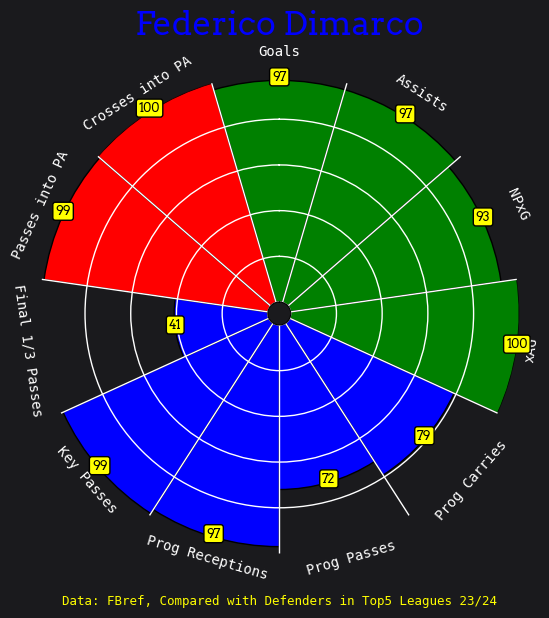

In [51]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(dimarco[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'yellow',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Federico Dimarco', fontsize=24, c='blue', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='yellow',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [52]:
fig.savefig('/Users/Trymso/Desktop/dimarco_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

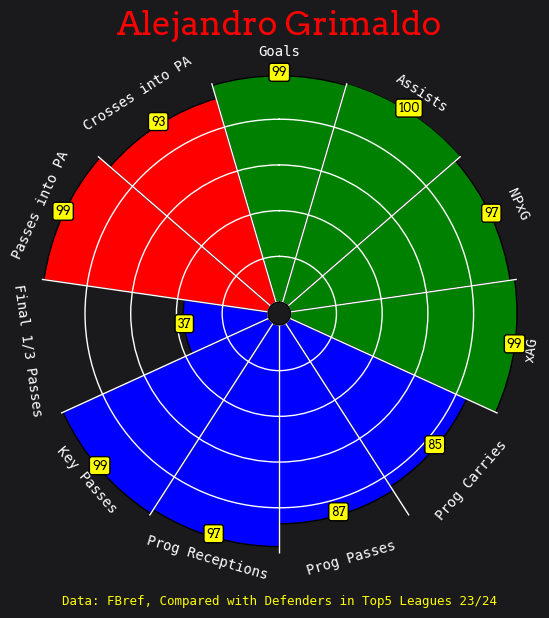

In [131]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(grimaldo[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'yellow',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Alejandro Grimaldo', fontsize=24, c='Red', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='yellow',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [135]:
fig.savefig('/Users/Trymso/Desktop/grimaldo_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

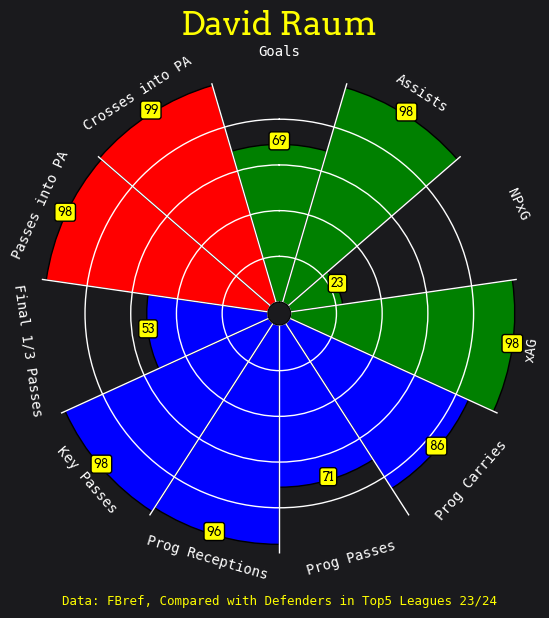

In [141]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(raum[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'yellow',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='David Raum', fontsize=24, c='yellow', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='yellow',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [143]:
fig.savefig('/Users/Trymso/Desktop/raum_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

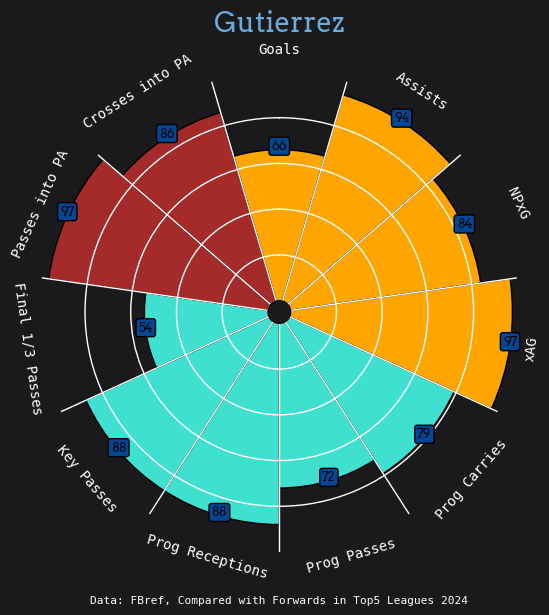

In [165]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(gutierrez[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Gutierrez', fontsize=20, c='#6CABDD', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

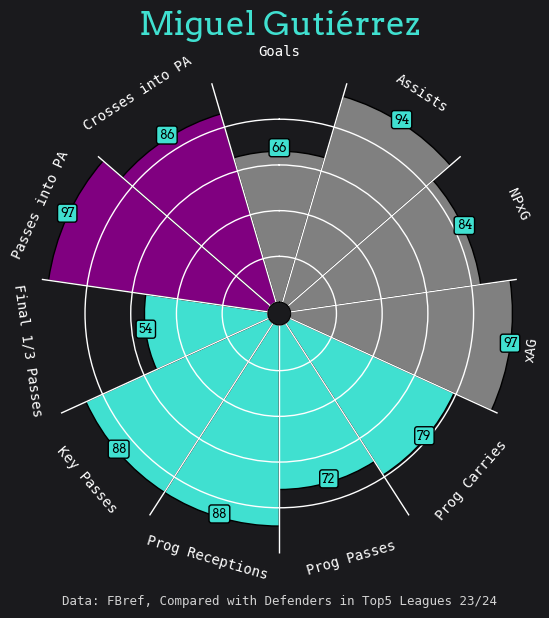

In [185]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(gutierrez[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'turquoise',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Miguel Gutiérrez', fontsize=24, c='turquoise', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='lightgrey',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [187]:
fig.savefig('/Users/Trymso/Desktop/gutierrez_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

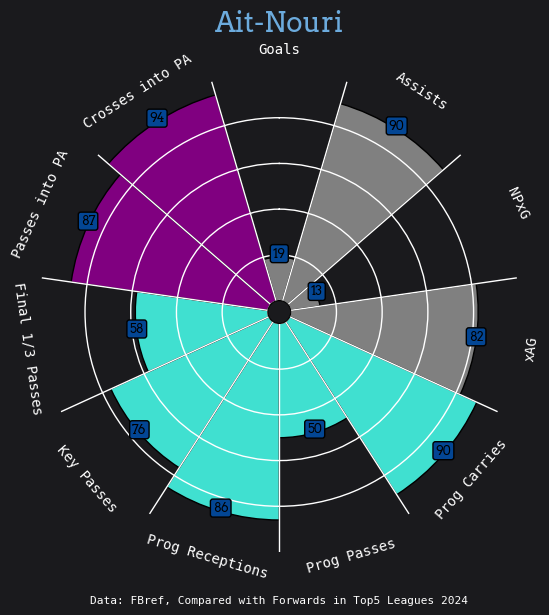

In [209]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(robinson[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Ait-Nouri', fontsize=20, c='#6CABDD', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [217]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

URL = Image.open("/Users/trymso/Documents/GitHub/complete-football-analytics/team_logos/chelsea_logo.png")
putellas_cropped = Image.open(URL)

AttributeError: 'PngImageFile' object has no attribute 'read'

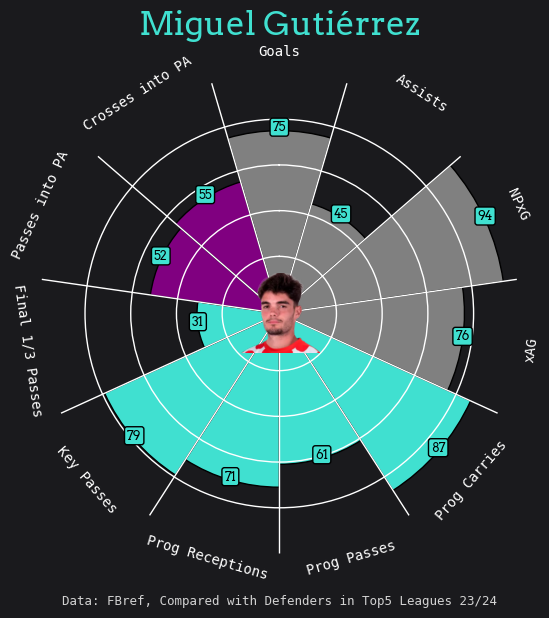

In [241]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(aitnouri[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'turquoise',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Miguel Gutiérrez', fontsize=24, c='turquoise', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='lightgrey',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/miguel.png"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



plt.show()